In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/marcodeano/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/marcodeano/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version
path = kagglehub.dataset_download("sooyoungher/smoking-drinking-dataset")
print("Path to dataset files:", path)

file_name = "smoking_driking_dataset_Ver01.csv"
file_path = f"{path}/{file_name}"
dataset = pd.read_csv(file_path)

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2


In [17]:
# Analisi iniziale del dataset
print("\nPrime righe del dataset:")
print(dataset.head())

print("\nDimensioni del dataset:")
print(dataset.shape)

print("\nTipi di dati:")
print(dataset.info())

print("\nStatistiche descrittive di base:")
print(dataset.describe())



Prime righe del dataset:
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_cre

### Prime considerazioni

I dati sembrano non contenere dati nulli o NaN, però si osserva facilmente che per alcune feature ci sono dei dati che sembrano essere irrealistici (Es.: per la feature **waistline** la media risulta essere _81_, il 4° quartile _87_ e il valore massimo _999_); quindi nonostante la non presenza di valori nulli, bisogna verificare se sono presenti valori mancanti codificati in altro modo.

/var/folders/9k/0zc4z1md49d58jhbq4fgqjg40000gn/T/ipykernel_1259/2882227443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoke.index, y=smoke.values, palette="Blues_d")
/var/folders/9k/0zc4z1md49d58jhbq4fgqjg40000gn/T/ipykernel_1259/2882227443.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drink.index, y=drink.values, palette="Greens_d")


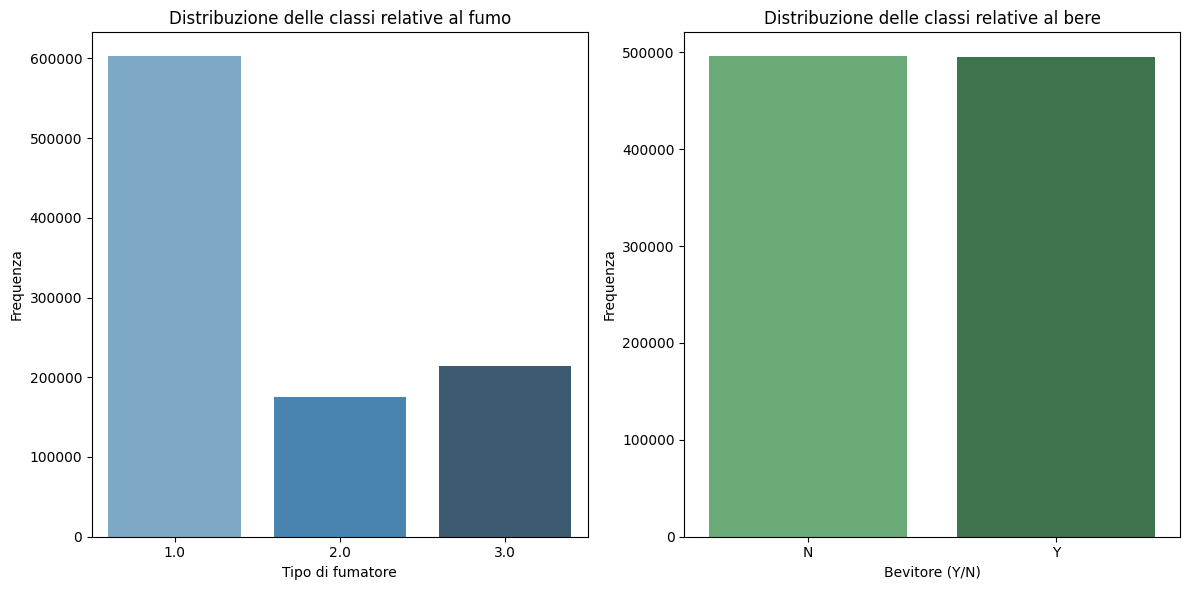

In [18]:
smoke = dataset["SMK_stat_type_cd"].value_counts()
drink = dataset["DRK_YN"].value_counts()

# Distribuzione SMK_stat_type_cd
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Num righe, num colonne, posizione 
sns.barplot(x=smoke.index, y=smoke.values, palette="Blues_d")
plt.title("Distribuzione delle classi relative al fumo")
plt.xlabel("Tipo di fumatore")
plt.ylabel("Frequenza")

# Distribuzione DRK_YN
plt.subplot(1, 2, 2)
sns.barplot(x=drink.index, y=drink.values, palette="Greens_d")
plt.title("Distribuzione delle classi relative al bere")
plt.xlabel("Bevitore (Y/N)")
plt.ylabel("Frequenza")

plt.tight_layout()
plt.show()

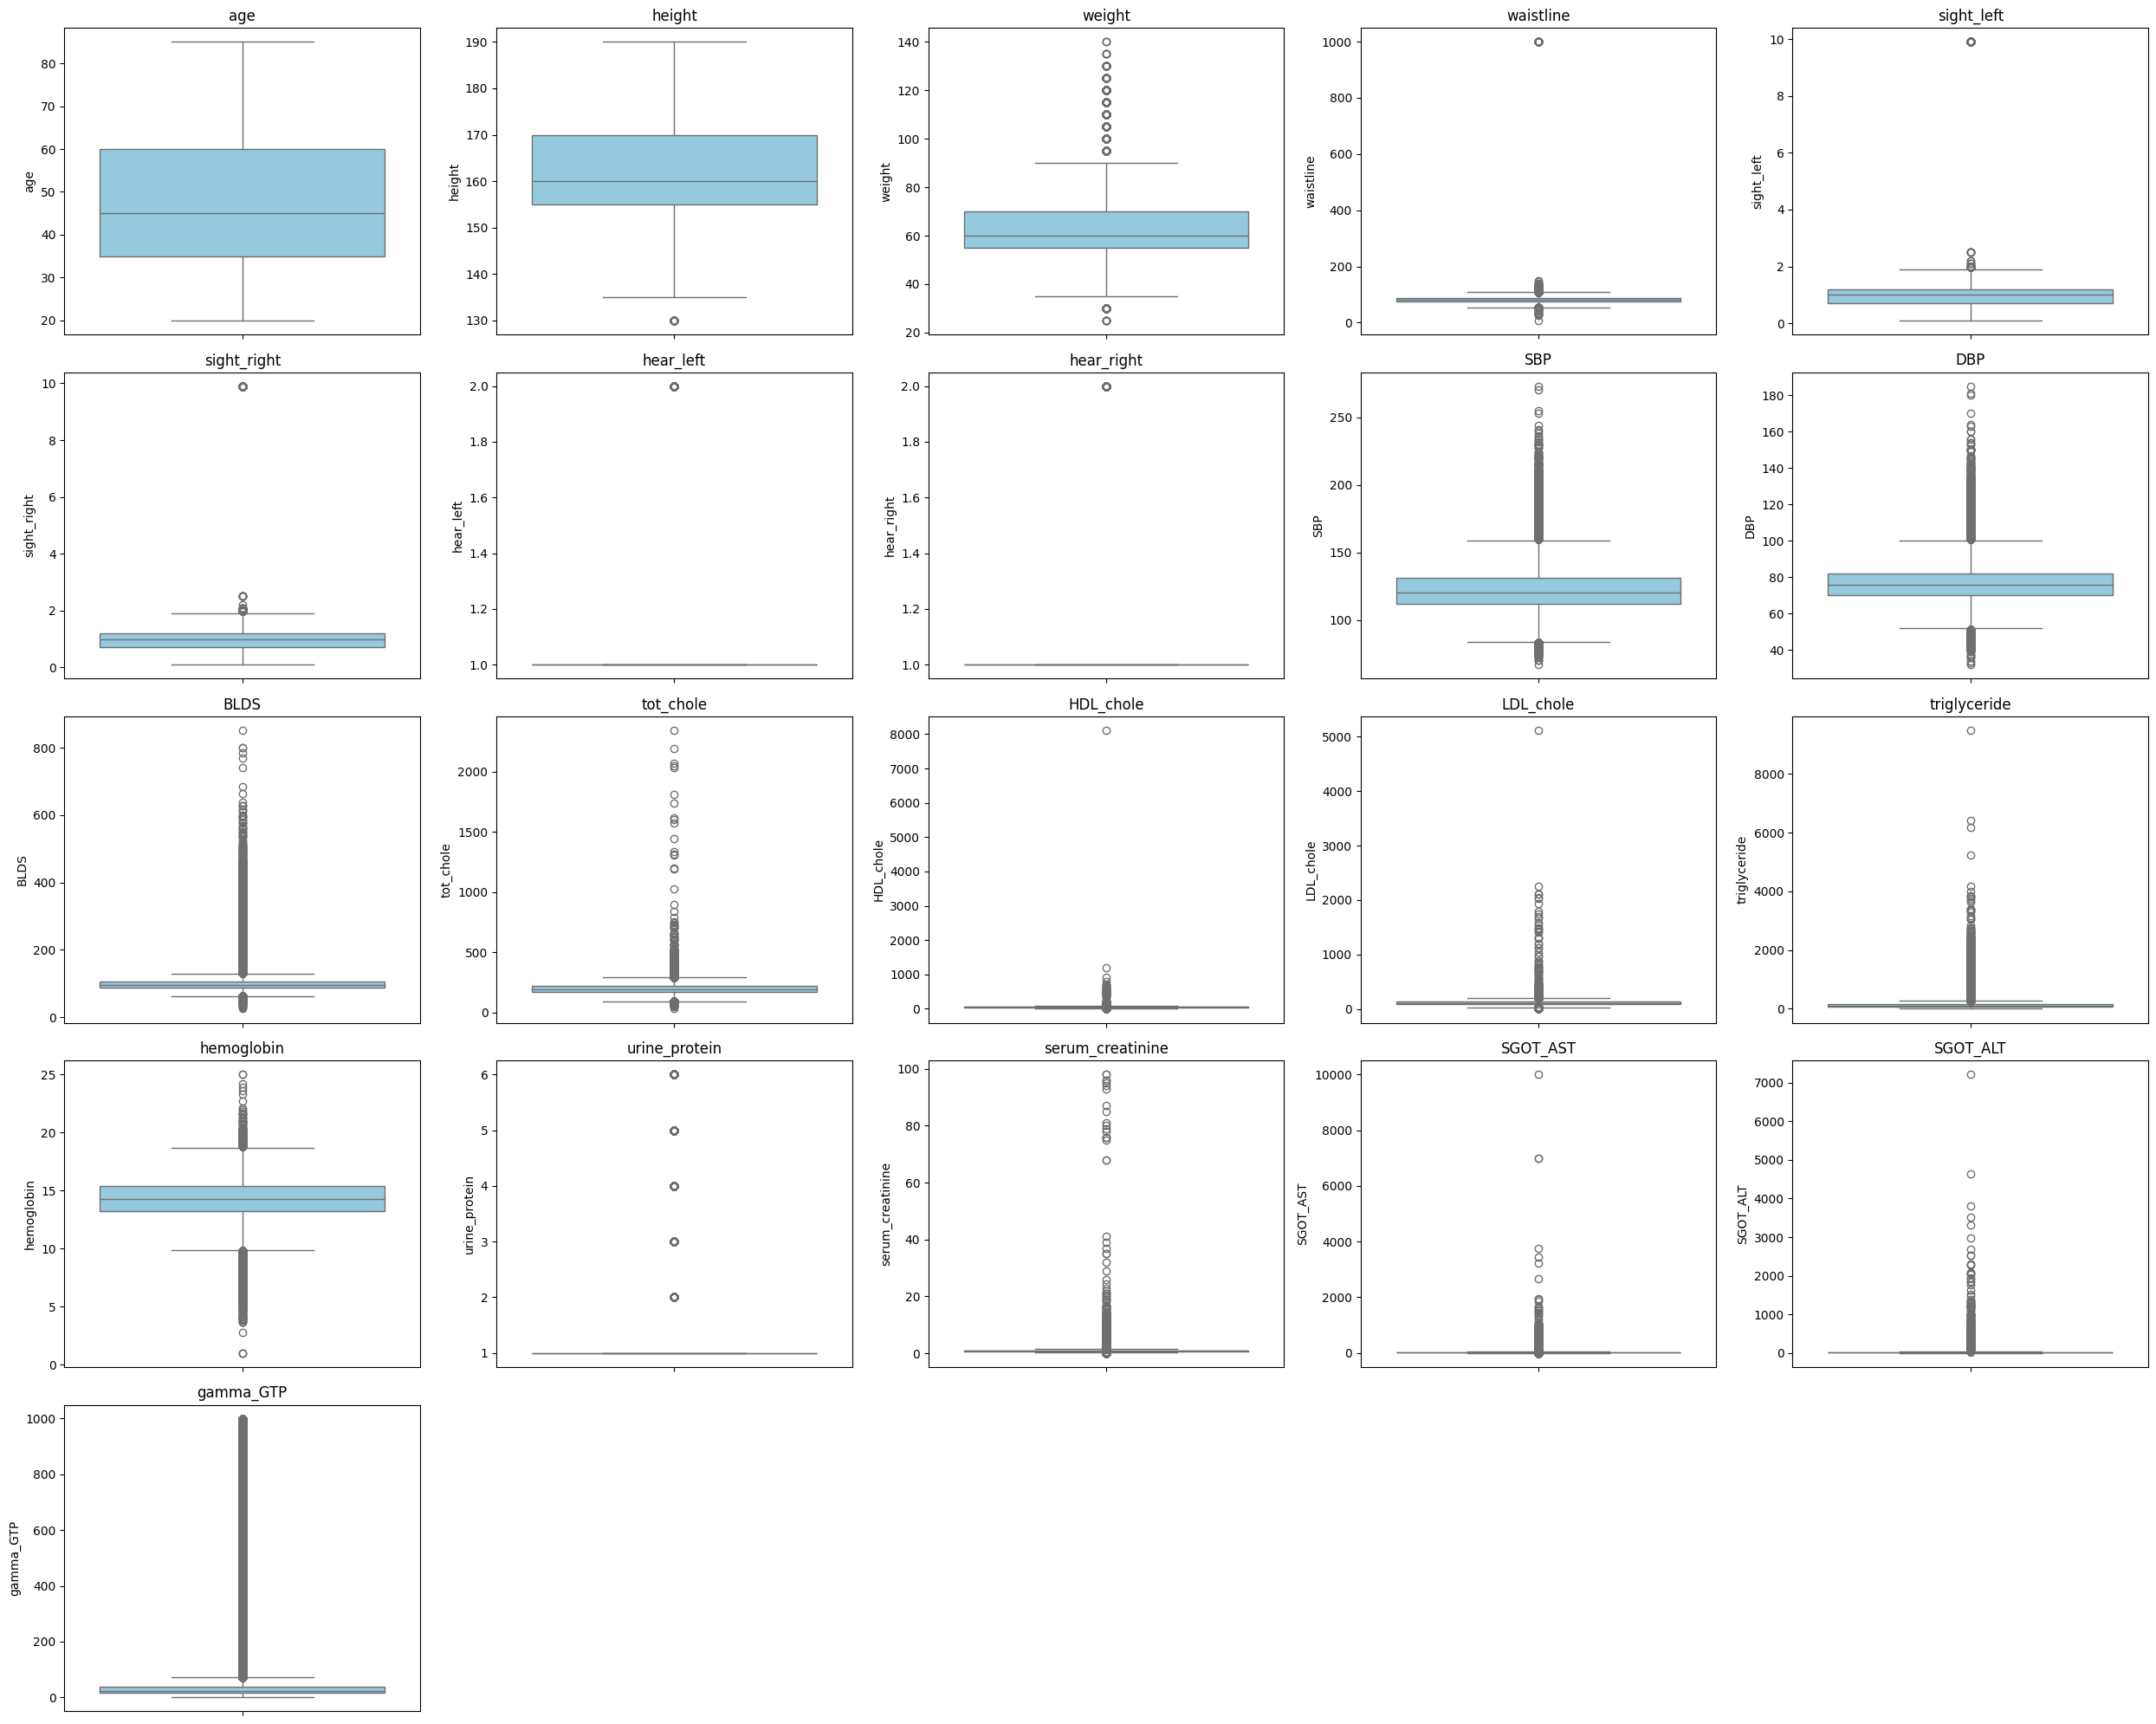

In [19]:
dataset_mod = dataset.drop(columns=["sex", "SMK_stat_type_cd", "DRK_YN"])

# Boxplot per le principali feature numeriche
plt.figure(figsize=(25, 20))
for i, col in enumerate(dataset_mod.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=dataset_mod[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()
plt.show()

In [20]:
# Verifica dei valori massimi e distanza dal secondo massimo e dalla media

for col in dataset_mod.columns:
    max = dataset_mod[col].max()
    max_count = (dataset_mod[col] == max).sum()
    second_max = dataset_mod[col][dataset_mod[col] < max].max()
    distance_max = max - second_max
    mean_value = dataset[col].mean()
    distance_mean = max - mean_value

    print(f"Colonna: {col}")
    print(f"    -Valore massimo: {max}")
    print(f"    -Occorrenze del massimo: {max_count}")
    print(f"    -Secondo massimo: {second_max}")
    print(f"    -Distanza tra massimo e secondo massimo: {distance_max}")
    print(f"    -Media: {mean_value}")
    print(f"    -Distanza tra massimo e media: {distance_mean}")
    print()

Colonna: age
    -Valore massimo: 85
    -Occorrenze del massimo: 3291
    -Secondo massimo: 80
    -Distanza tra massimo e secondo massimo: 5
    -Media: 47.614490803412735
    -Distanza tra massimo e media: 37.385509196587265

Colonna: height
    -Valore massimo: 190
    -Occorrenze del massimo: 363
    -Secondo massimo: 185
    -Distanza tra massimo e secondo massimo: 5
    -Media: 162.24062537196903
    -Distanza tra massimo e media: 27.75937462803097

Colonna: weight
    -Valore massimo: 140
    -Occorrenze del massimo: 3
    -Secondo massimo: 135
    -Distanza tra massimo e secondo massimo: 5
    -Media: 63.28405017017268
    -Distanza tra massimo e media: 76.71594982982732

Colonna: waistline
    -Valore massimo: 999.0
    -Occorrenze del massimo: 57
    -Secondo massimo: 149.1
    -Distanza tra massimo e secondo massimo: 849.9
    -Media: 81.23335777821268
    -Distanza tra massimo e media: 917.7666422217874

Colonna: sight_left
    -Valore massimo: 9.9
    -Occorrenze del mass

In [21]:
# Determinazione del numero di valori "fuori scala" (outliers) per ogni feature

for col in dataset_mod.columns:
    Q1 = dataset_mod[col].quantile(0.25)
    Q3 = dataset_mod[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataset_mod[(dataset_mod[col] < lower_bound) | (dataset_mod[col] > upper_bound)]
    print(f"Colonna: {col}")
    print(f"    -Valori fuori scala: {len(outliers)}")
    print(f"    -Limiti: {lower_bound} - {upper_bound}")
    print()

Colonna: age
    -Valori fuori scala: 0
    -Limiti: -2.5 - 97.5

Colonna: height
    -Valori fuori scala: 86
    -Limiti: 132.5 - 192.5

Colonna: weight
    -Valori fuori scala: 19221
    -Limiti: 32.5 - 92.5

Colonna: waistline
    -Valori fuori scala: 4417
    -Limiti: 53.54999999999999 - 108.35

Colonna: sight_left
    -Valori fuori scala: 11582
    -Limiti: -0.050000000000000044 - 1.95

Colonna: sight_right
    -Valori fuori scala: 10495
    -Limiti: -0.050000000000000044 - 1.95

Colonna: hear_left
    -Valori fuori scala: 31222
    -Limiti: 1.0 - 1.0

Colonna: hear_right
    -Valori fuori scala: 30212
    -Limiti: 1.0 - 1.0

Colonna: SBP
    -Valori fuori scala: 15836
    -Limiti: 83.5 - 159.5

Colonna: DBP
    -Valori fuori scala: 13122
    -Limiti: 52.0 - 100.0

Colonna: BLDS
    -Valori fuori scala: 64202
    -Limiti: 62.5 - 130.5

Colonna: tot_chole
    -Valori fuori scala: 11298
    -Limiti: 94.0 - 294.0

Colonna: HDL_chole
    -Valori fuori scala: 13858
    -Limiti: 16.0 - 

### Considerazioni

Un'analisi più approfondita ha permesso di individuare la presenza di alcuni outlier in specifiche feature, in particolare confrontando il valore massimo presente nel dataset con il secondo valore massimo per ciascuna di esse; è importante sottolineare però che non tutte le feature mostrano grosse differenze tra il primo e il secondo massimo ed in molti casi sono presenti molti valori tra il massimo e la media.

Sono state fatte dunque delle brevi ricerche per capire quali valori fossero plausibili per ogni feature e quali no, è stato deciso di stabilire una soglia massima accettabile per alcune di queste; queste soglie sono state definite con l'obiettivo di preservare il maggior numero possibile di righe del dataset originario ma eliminando allo stesso tempo i casi clinicamente estremi e rari, in modo da ottenere un dataset più generico, privo di situazioni patologiche estreme.

In [24]:
thresholds = {
    "waistline": 200,
    "sight_left": 4,
    "sight_right": 4,
    "SBP": 240,
    "DBP": 160,
    "BLDS": 600,
    "tot_chole": 1000,
    "HDL_chole": 700,
    "LDL_chole": 2000,
    "triglyceride": 3500,
    "serum_creatinine": 30,
    "SGOT_AST": 2000,
    "SGOT_ALT": 2000,
    "gamma_GTP": 900,
}

for col, threshold in thresholds.items():
    dataset.loc[dataset[col] > threshold, col] = None

# Rimozione delle righe con valori mancanti
dataset_cleaned = dataset.dropna(subset=thresholds.keys())

Ora verranno rieseguite tutte le operazioni di visualizzazione dei dati presenti nel dataset per comprendere la distribuzione di questi dopo l'operazione di rimozione degli outliers.

In [25]:
# Analisi iniziale del dataset
print("\nPrime righe del dataset:")
print(dataset_cleaned.head())

print("\nDimensioni del dataset:")
print(dataset_cleaned.shape)

print("\nTipi di dati:")
print(dataset_cleaned.info())

print("\nStatistiche descrittive di base:")
print(dataset_cleaned.describe())


Prime righe del dataset:
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_cre

/var/folders/9k/0zc4z1md49d58jhbq4fgqjg40000gn/T/ipykernel_1259/3938718437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoke.index, y=smoke.values, palette="Blues_d")
/var/folders/9k/0zc4z1md49d58jhbq4fgqjg40000gn/T/ipykernel_1259/3938718437.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drink.index, y=drink.values, palette="Greens_d")


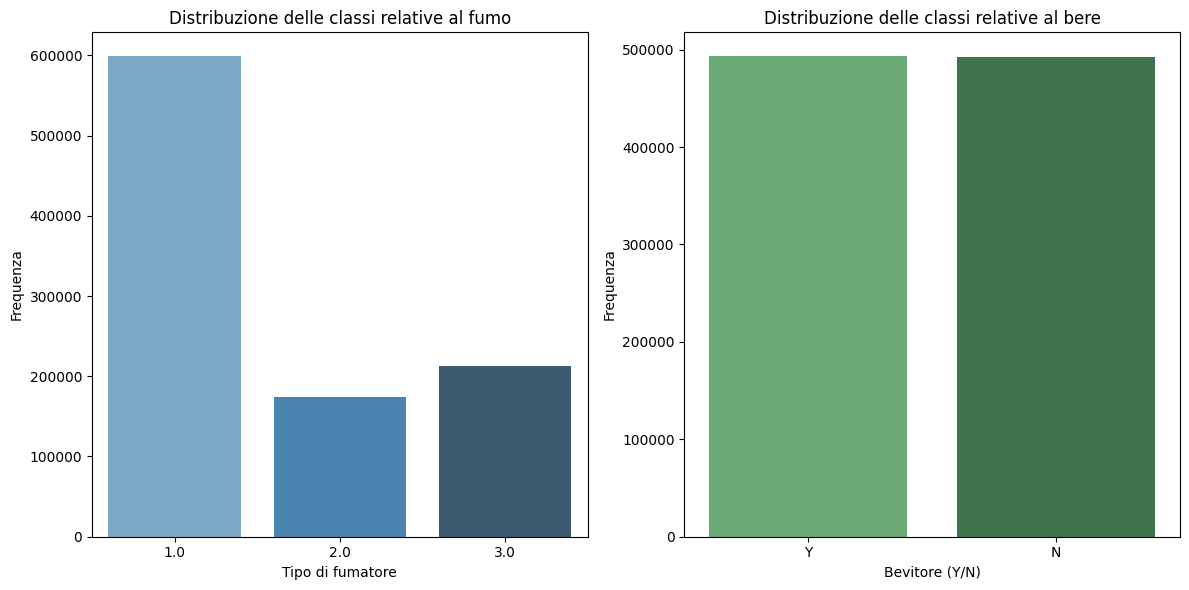

In [26]:
smoke = dataset_cleaned["SMK_stat_type_cd"].value_counts()
drink = dataset_cleaned["DRK_YN"].value_counts()

# Distribuzione SMK_stat_type_cd
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Num righe, num colonne, posizione 
sns.barplot(x=smoke.index, y=smoke.values, palette="Blues_d")
plt.title("Distribuzione delle classi relative al fumo")
plt.xlabel("Tipo di fumatore")
plt.ylabel("Frequenza")

# Distribuzione DRK_YN
plt.subplot(1, 2, 2)
sns.barplot(x=drink.index, y=drink.values, palette="Greens_d")
plt.title("Distribuzione delle classi relative al bere")
plt.xlabel("Bevitore (Y/N)")
plt.ylabel("Frequenza")

plt.tight_layout()
plt.show()

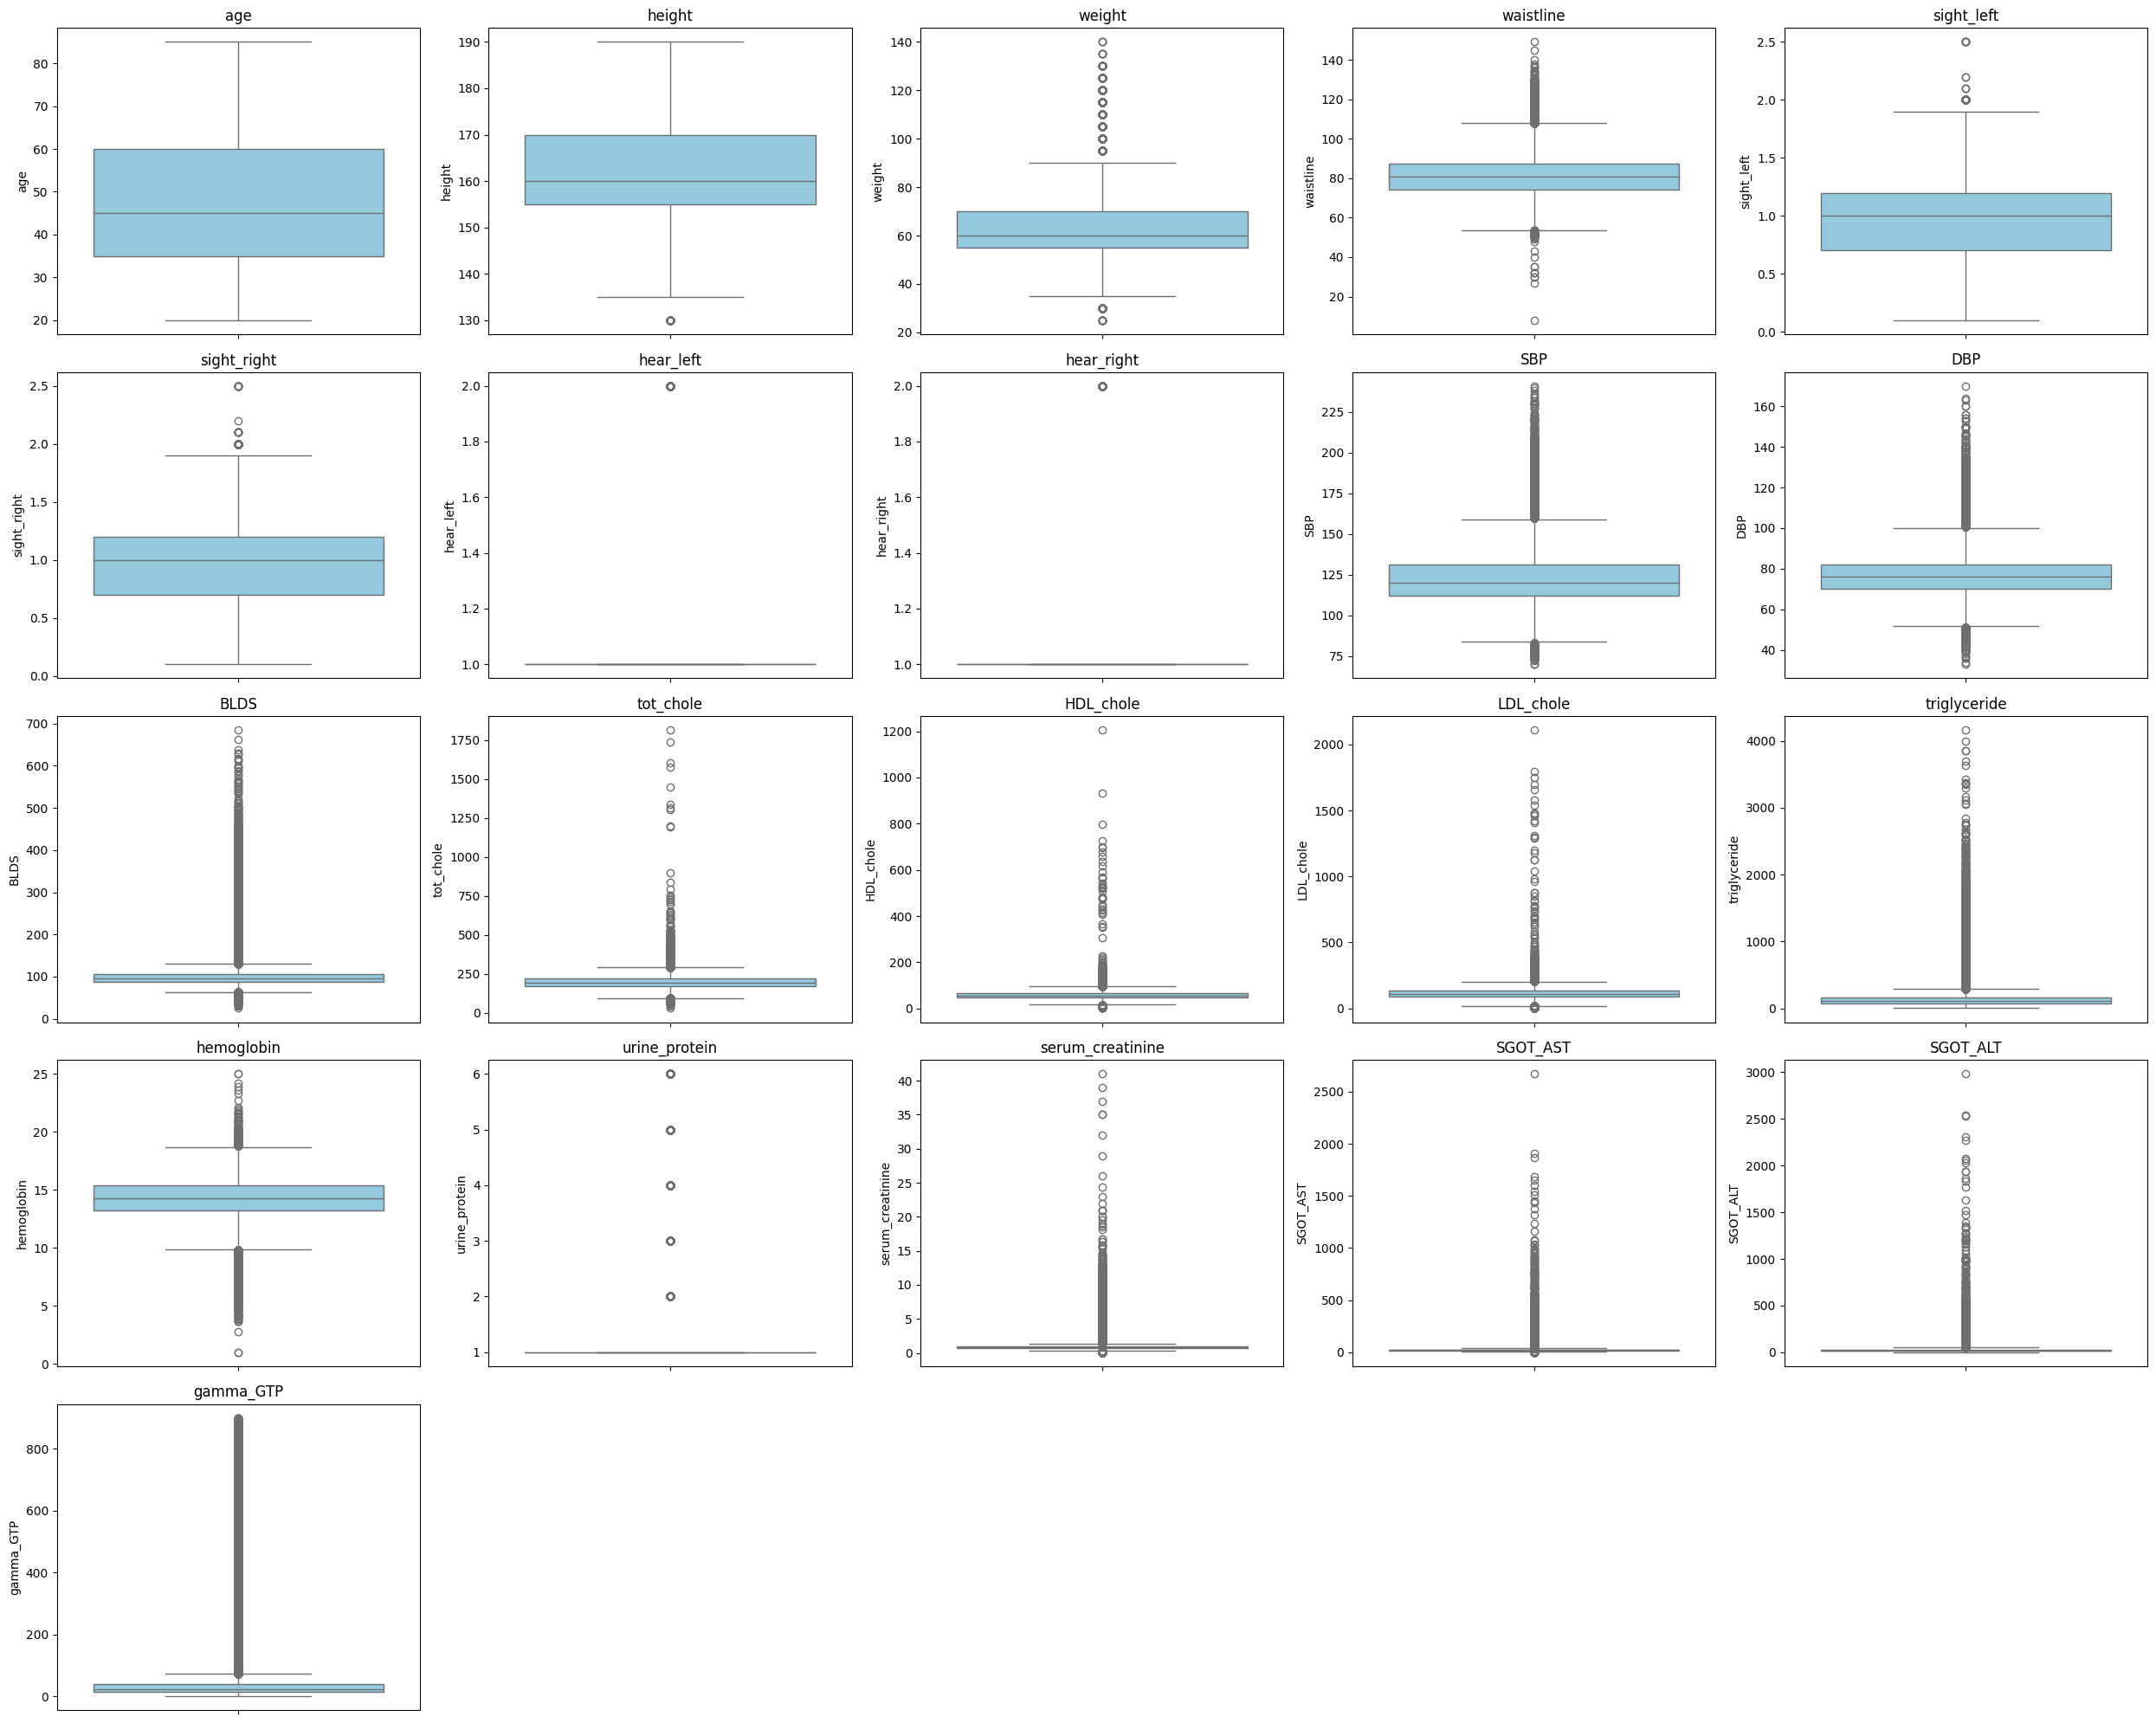

In [27]:
dataset_mod = dataset_cleaned.drop(columns=["sex", "SMK_stat_type_cd", "DRK_YN"])

# Boxplot per le principali feature numeriche
plt.figure(figsize=(25, 20))
for i, col in enumerate(dataset_mod.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=dataset_mod[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
# Verifica dei valori massimi e distanza dal secondo massimo e dalla media

for col in dataset_mod.columns:
    max = dataset_mod[col].max()
    max_count = (dataset_mod[col] == max).sum()
    second_max = dataset_mod[col][dataset_mod[col] < max].max()
    distance_max = max - second_max
    mean_value = dataset[col].mean()
    distance_mean = max - mean_value

    print(f"Colonna: {col}")
    print(f"    -Valore massimo: {max}")
    print(f"    -Occorrenze del massimo: {max_count}")
    print(f"    -Secondo massimo: {second_max}")
    print(f"    -Distanza tra massimo e secondo massimo: {distance_max}")
    print(f"    -Media: {mean_value}")
    print(f"    -Distanza tra massimo e media: {distance_mean}")
    print()